## Alejandro Carrillo Gómez

In [1]:
# En opencv se puede calcular la correlación entre dos imágenes usando la función cv2.matchTemplate() 
# y la función cv2.minMaxLoc() para encontrar el valor máximo y mínimo de la matriz de correlación.
# La función cv2.matchTemplate() devuelve una matriz de correlación de tamaño (W-w+1) x (H-h+1) donde W y H son las 
# dimensiones de la imagen de entrada y w y h son las dimensiones de la plantilla.
# La función cv2.minMaxLoc() devuelve el valor máximo y mínimo de la matriz de correlación y sus coordenadas.
# La función cv2.threshold() devuelve un valor de umbral y una imagen binaria.
# La función cv2.findContours() devuelve una lista de contornos y una jerarquía de contornos.
# La función cv2.drawContours() dibuja los contornos en una imagen.
# La función cv2.boundingRect() devuelve los valores de x, y, ancho y alto de un rectángulo que contiene el contorno.
# La función cv2.rectangle() dibuja un rectángulo en una imagen.
# La función cv2.putText() dibuja un texto en una imagen.


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('motos.jpg',0)
img2 = img.copy()


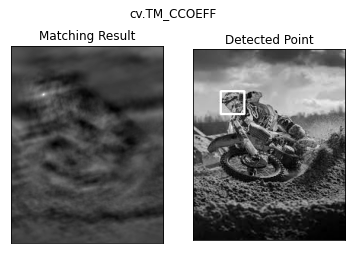

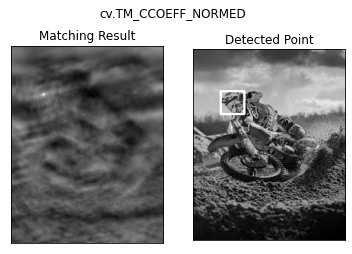

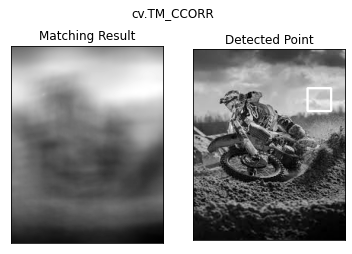

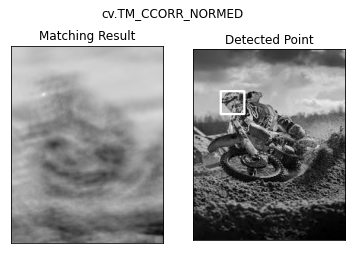

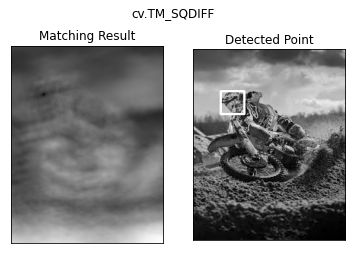

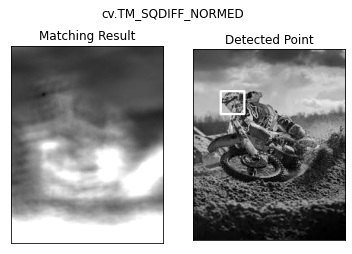

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('motos.jpg',0)
img2 = img.copy()
template = cv.imread('motos_2.jpg',0)
w, h = template.shape[::-1]
# # Todos los 6 métodos de comparación en una lista
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Aplicar coincidencia de plantilla o parche (matchTemplate)
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomar mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    cv.imwrite("Res.jpg",res)
    cv.imshow("Resultado", res)
    cv.waitKey(0)
    cv.destroyAllWindows()